In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
import matplotlib.pyplot as plt
from datetime import datetime as dt
plt.style.use('fivethirtyeight')

In [2]:
#get the stock data
STOCK = 'ZOMATO.NS'
headcheck=0
df = web.DataReader(STOCK, data_source='yahoo' , start='1980-12-12' , end='2022-07-29')

#show the data
df[-11::]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-15,56.200001,53.349998,56.200001,53.900002,47995067,53.900002
2022-07-18,55.099998,52.849998,54.700001,53.599998,47689463,53.599998
2022-07-19,54.400002,53.299999,53.650002,53.950001,35427093,53.950001
2022-07-20,54.500000,53.200001,54.500000,53.400002,37683099,53.400002
2022-07-21,54.450001,52.700001,53.349998,53.500000,29402446,53.500000
2022-07-22,54.000000,52.900002,53.750000,53.650002,27302087,53.650002
2022-07-25,52.500000,46.000000,52.500000,47.599998,232841112,47.599998
2022-07-26,46.650002,41.200001,46.599998,41.650002,412304737,41.650002
2022-07-27,44.400002,40.599998,40.849998,43.950001,411205172,43.950001


In [3]:
week_count=0
new_week=1
day_count=0
profit_count=0
loss_count=0
week_vol=0
for i in range(len(df)-1):
    cur_date = df.index[i]
    next_date = df.index[i+1]
    s = cur_date.strftime("%A")
    week_day_num = cur_date.isoweekday()
    week_nextday_num = next_date.isoweekday()
    now = dt.now()
    day_count = day_count+1
    
    o2c = df['Close'][i]-df['Open'][i]
    if(o2c>0):
        profit_count=profit_count+1
    else:
        loss_count=loss_count+1
    
    if(new_week==1):
        week_count=week_count+1
        week_start_date = cur_date
        new_week=0
        week_vol=0
        day_count = 1
    week_vol= week_vol + df['Volume'][i]
    week_end_date = cur_date
    
    if(week_day_num>week_nextday_num):
        #Writing into prediction file(CSV)
        header = pd.DataFrame(columns=['Week ID','Week Start Date','Week End Date','Days','Profit','Loss','Volume'])
        row = pd.DataFrame([[week_count,week_start_date,week_end_date,day_count,profit_count,loss_count,week_vol]], columns=['Week','Week Start Date','Week End Date','Days','Profit','Loss','Volume'])
        target_filename = "Weekly Dataset/"+ STOCK + " Weekly Dataset.csv"
        if(headcheck==0):
            header.to_csv(target_filename,index=False)
            headcheck=1
        row.to_csv(target_filename, mode="a" , header=False, index=False)
        
        
        print("Week #{}   ".format(week_count),end=" ")
        print("Start Date:{}  End Date:{}  ".format(str(week_start_date)[0:10],str(week_end_date)[0:10]),end=" ")
        print("{} days   ".format(day_count),end=" ")
        print("P:{}/{}   ".format(profit_count,day_count),end=" ")
        print("L:{}/{}   ".format(loss_count,day_count),end=" ")
        print("Volume:{} ".format(week_vol))
        profit_count=0
        loss_count=0
        
        day_count=0
        new_week=1
        
        
    
    

Week #1    Start Date:2021-07-23  End Date:2021-07-23   1 days    P:1/1    L:0/1    Volume:694895290 
Week #2    Start Date:2021-07-26  End Date:2021-07-30   5 days    P:3/5    L:2/5    Volume:856145096 
Week #3    Start Date:2021-08-02  End Date:2021-08-06   5 days    P:2/5    L:3/5    Volume:225066642 
Week #4    Start Date:2021-08-09  End Date:2021-08-13   5 days    P:2/5    L:3/5    Volume:281156054 
Week #5    Start Date:2021-08-16  End Date:2021-08-20   4 days    P:2/4    L:2/4    Volume:112477048 
Week #6    Start Date:2021-08-23  End Date:2021-08-27   5 days    P:1/5    L:4/5    Volume:219136226 
Week #7    Start Date:2021-08-30  End Date:2021-09-03   5 days    P:4/5    L:1/5    Volume:227306257 
Week #8    Start Date:2021-09-06  End Date:2021-09-09   4 days    P:2/4    L:2/4    Volume:112337526 
Week #9    Start Date:2021-09-13  End Date:2021-09-17   5 days    P:0/5    L:5/5    Volume:209576575 
Week #10    Start Date:2021-09-20  End Date:2021-09-24   5 days    P:1/5    L:4/5 

In [4]:
df = pd.read_csv("Weekly Dataset/"+ STOCK + " Weekly Dataset.csv")
print(df)
df[["Week ID","Profit","Loss"]]

    Week ID Week Start Date Week End Date  Days  Profit  Loss     Volume
0         1      2021-07-23    2021-07-23     1       1     0  694895290
1         2      2021-07-26    2021-07-30     5       3     2  856145096
2         3      2021-08-02    2021-08-06     5       2     3  225066642
3         4      2021-08-09    2021-08-13     5       2     3  281156054
4         5      2021-08-16    2021-08-20     4       2     2  112477048
5         6      2021-08-23    2021-08-27     5       1     4  219136226
6         7      2021-08-30    2021-09-03     5       4     1  227306257
7         8      2021-09-06    2021-09-09     4       2     2  112337526
8         9      2021-09-13    2021-09-17     5       0     5  209576575
9        10      2021-09-20    2021-09-24     5       1     4  100932072
10       11      2021-09-27    2021-10-01     5       3     2   70098242
11       12      2021-10-04    2021-10-08     5       1     4   46421258
12       13      2021-10-11    2021-10-14     4    

,Week ID,Profit,Loss
0,1,1,0
1,2,3,2
2,3,2,3
3,4,2,3
4,5,2,2
5,6,1,4
6,7,4,1
7,8,2,2
8,9,0,5
9,10,1,4


1
0
1     1
28    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
29    1
27    1
2     1
26    1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
53    1
Name: Week ID, dtype: int64
2    20
1    19
3     7
0     4
4     2
Name: Profit, dtype: int64


<Figure size 1152x576 with 0 Axes>

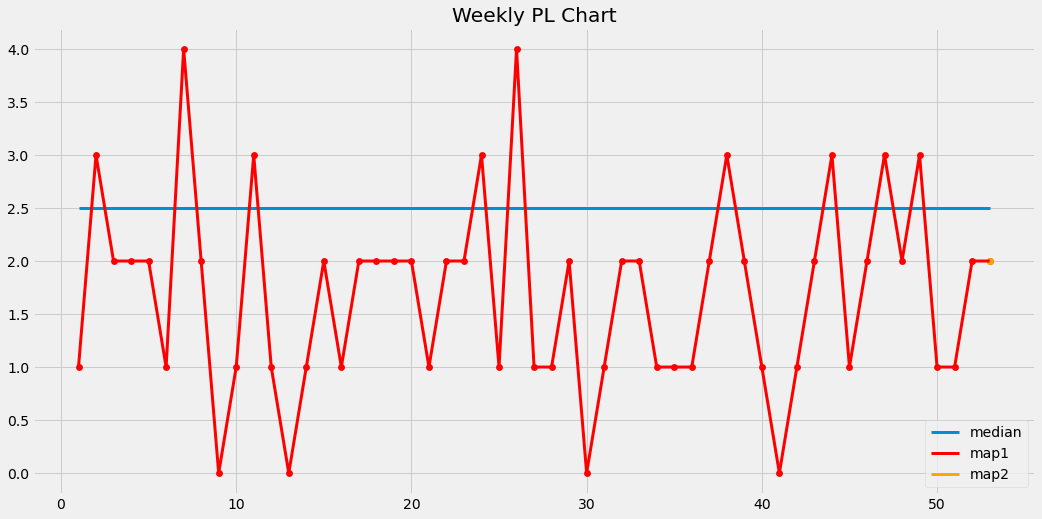

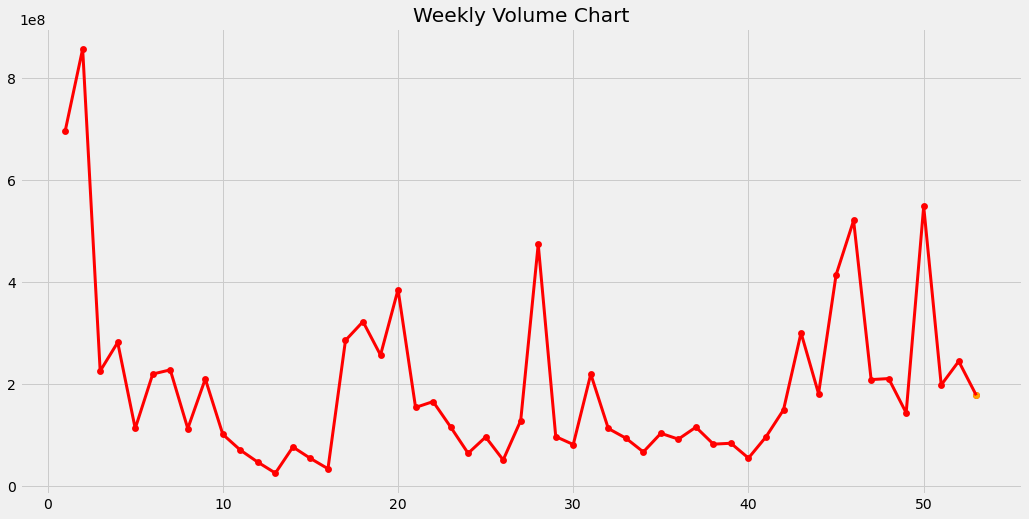

In [11]:
ldf = len(df["Week ID"])
print(ldf//52)
xpoints = df["Week ID"]
ypoints = df["Profit"]
plt.figure(figsize=(16,8))
for i in range(ldf//52):
    print(i)
    plt.figure(figsize=(16,8))
    tempx=[]
    tempx = df["Week ID"]
    #print(list(tempx))
    tempy=[]
    for j in range(len(tempx)):
        tempy.append(2.5)
    
    plt.plot(tempx[i*52:(i*52)+52+52],tempy[i*52:(i*52)+52+52],linewidth=3)
    print(df['Week ID'][0:52+52].value_counts())
    plt.plot(df["Week ID"][i*52:(i*52)+52+1],df["Profit"][i*52:(i*52)+52+1],linewidth=3,color="red")
    print(df['Profit'][i*52:(i*52)+52].value_counts())
    plt.title("Weekly PL Chart")
    plt.plot(df["Week ID"][(i*52)+52:(i*52)+52+52],df["Profit"][(i*52)+52:(i*52)+52+52],linewidth=3,color="orange")
    

    plt.scatter(df["Week ID"][i*52:(i*52)+52+1],df["Profit"][i*52:(i*52)+52+1],linewidth=3,color="red",s=15)

    plt.scatter(df["Week ID"][(i*52)+52:(i*52)+52+52],df["Profit"][(i*52)+52:(i*52)+52+52],linewidth=3,color="orange",s=15)

    plt.legend(['median', 'map1','map2'], loc='lower right')
    plt.show()
    plt.figure(figsize=(16,8))
    plt.title("Weekly Volume Chart")
    plt.plot(df['Week ID'][i*52:(i*52)+52+1],df['Volume'][i*52:(i*52)+52+1],linewidth=3,color="red")
    plt.plot(df['Week ID'][(i*52)+52:(i*52)+52+52],df['Volume'][(i*52)+52:(i*52)+52+52],linewidth=3,color="orange")
    
    plt.scatter(df["Week ID"][i*52:(i*52)+52+1],df["Volume"][i*52:(i*52)+52+1],linewidth=3,color="red",s=15)

    plt.scatter(df["Week ID"][(i*52)+52:(i*52)+52+52],df["Volume"][(i*52)+52:(i*52)+52+52],linewidth=3,color="orange",s=15)

    
    plt.show()
    
    


In [6]:
df['Profit'].value_counts()

2    21
1    19
3     7
0     4
4     2
Name: Profit, dtype: int64

In [7]:
df['Loss'].value_counts()

3    20
4    15
2    11
1     3
5     3
0     1
Name: Loss, dtype: int64